In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset\Online Shop Customer Sales Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [3]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [4]:
df.drop(['Customer_id', 'Purchase_DATE'], axis=1, inplace=True)
df

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,53,0,45.3,2,24.915,1,885,0,0,0
1,18,1,36.2,3,2.896,2,656,0,0,1
2,52,1,10.6,1,10.600,0,761,0,1,0
3,29,0,54.1,5,43.280,1,906,0,1,0
4,21,1,56.9,1,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...
65791,30,1,10.9,4,6.213,1,894,0,0,0
65792,33,0,29.3,1,29.300,0,722,0,0,0
65793,50,0,25.4,5,23.114,3,424,0,0,0
65794,56,0,29.2,1,29.200,3,731,0,0,0


In [5]:
from pycaret.clustering import *
s = setup(df, normalize = True, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(65796, 10)"
2,Transformed data shape,"(65796, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [6]:
# functional API
kmeans = create_model('kmeans')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:50:49
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0919,6148.5928,2.6227,0,0,0


In [7]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [8]:
# functional API
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

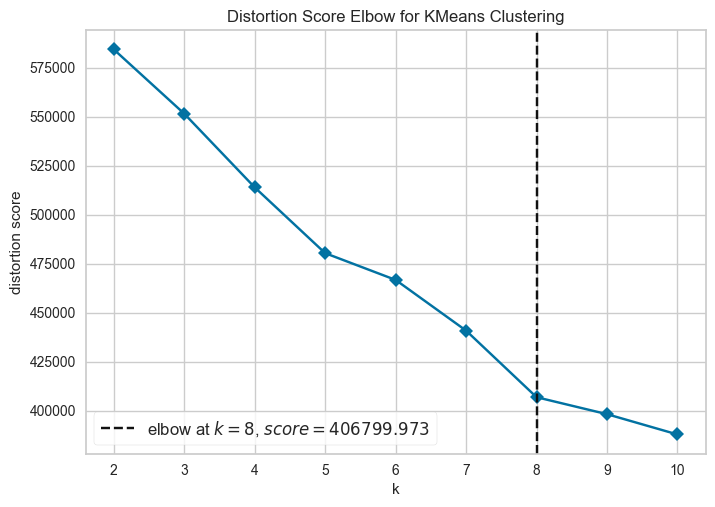

In [9]:
plot_model(kmeans, plot = 'elbow') 

In [10]:
plot_model(kmeans, plot = 'silhouette')


KeyboardInterrupt



Error in callback <function flush_figures at 0x00000164F1F2B370> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# functional API
result = assign_model(kmeans)
result.head()

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Cluster
0,53,0,45.299999,2,24.915001,1,885,0,0,0,Cluster 0
1,18,1,36.200001,3,2.896000,2,656,0,0,1,Cluster 2
2,52,1,10.600000,1,10.600000,0,761,0,1,0,Cluster 1
3,29,0,54.099998,5,43.279999,1,906,0,1,0,Cluster 0
4,21,1,56.900002,1,56.900002,1,605,0,1,0,Cluster 0
